## The epidemic models
### Solving the ordinary differential equation for the SIR model with SciPy

In [1]:
import scipy
import scipy.integrate
import pylab as plt
import numpy as np

Define the `SIR_model` function, which will contain the ODE, with beta representing the transmission probability, gamma as the infected period, `X[0]` representing the susceptible population, and `X[1]` the infected population

In [2]:
beta: float = 0.003
gamma: float = 0.1

def SIR_model(X, t=0):
    return np.array([-beta*X[0]*X[1], 
                     beta*X[0]*X[1] - gamma*X[1], 
                     gamma*X[1]])

Define the initial `parameters` (SIR) and the `time` (number of days), then, with the `scipy.integrate.odeint` function, we will solve the differential equations system

In [3]:
time = np.linspace(0, 60, num=100)
parameters = np.array([225, 1, 0])
X = scipy.integrate.odeint(SIR_model, parameters, time)

In [4]:
X[:5]

array([[2.25000000e+02, 1.00000000e+00, 0.00000000e+00],
       [2.24511177e+02, 1.41632577e+00, 7.24969630e-02],
       [2.23821028e+02, 2.00385053e+00, 1.75121774e-01],
       [2.22848937e+02, 2.83085357e+00, 3.20209039e-01],
       [2.21484283e+02, 3.99075767e+00, 5.24959040e-01]])

Plot the three populations

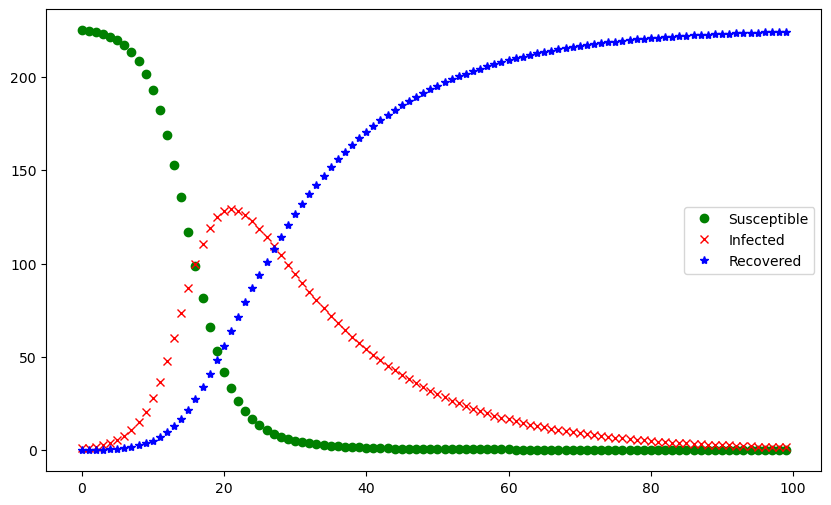

In [5]:
plt.figure(figsize=[10, 6])
plt.plot(range(0, 100), X[:,0], 'o', color ="green")
plt.plot(range(0, 100), X[:,1], 'x', color ="red")
plt.plot(range(0, 100), X[:,2], '*', color ="blue")
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.show()

### The SIRS model

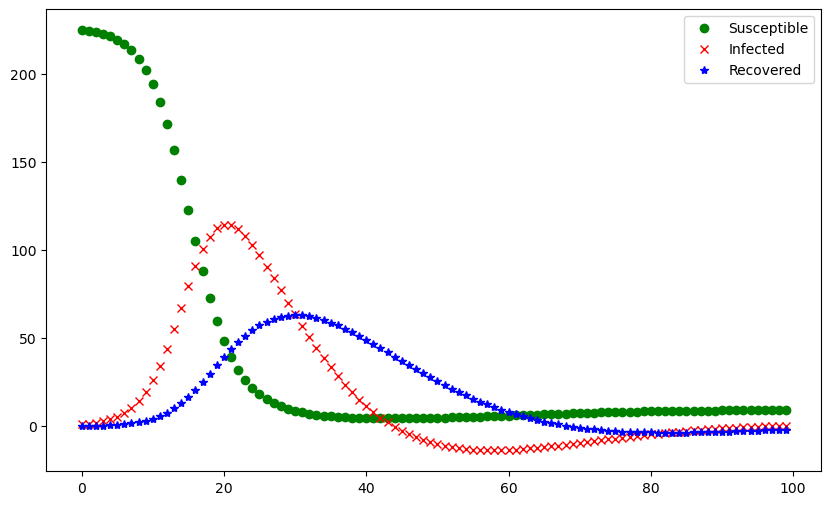

In [6]:
beta = 0.003
gamma = 0.1
sigma = 0.1
def SIRS_model(X, t=0):
    return np.array([-beta*X[0]*X[1] + sigma*X[2], 
                     beta*X[0]*X[1] - gamma*X[1], 
                     gamma*X[1] ] -sigma*X[2])

time = np.linspace(0, 60, num=100)
parameters = np.array([225, 1, 0])
X = scipy.integrate.odeint(SIRS_model, parameters, time)

plt.figure(figsize=[10, 6])
plt.plot(range(0, 100), X[:,0], 'o', color ="green")
plt.plot(range(0, 100), X[:,1], 'x', color ="red")
plt.plot(range(0, 100), X[:,2], '*', color ="blue")
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.show()

## Record CA Data

In [7]:
import pylab as plt
import numpy as np

#data = np.array([215,10,0,205,20,0,191,34,0,155,70,0,108,100,17,75,120,30,47,115,63,30,90,105,19,62,144,14,41,170,11,22,192,10,10,205,10,5,210,10,1,214,10,0,215,10,0,215,10,0,215,10,0,215,10,0,215,10,0,215,10,0,215,10,0,215,10,0,215])
data = np.array([215,10,0,153,72,0,54,171,0,2,223,0,0,225,0,0,178,47,0,72,153,0,6,219,0,0,225,47,0,178,153,0,72,219,0,6,225,0,0])

result = data.reshape(-1,3)

result

array([[215,  10,   0],
       [153,  72,   0],
       [ 54, 171,   0],
       [  2, 223,   0],
       [  0, 225,   0],
       [  0, 178,  47],
       [  0,  72, 153],
       [  0,   6, 219],
       [  0,   0, 225],
       [ 47,   0, 178],
       [153,   0,  72],
       [219,   0,   6],
       [225,   0,   0]])

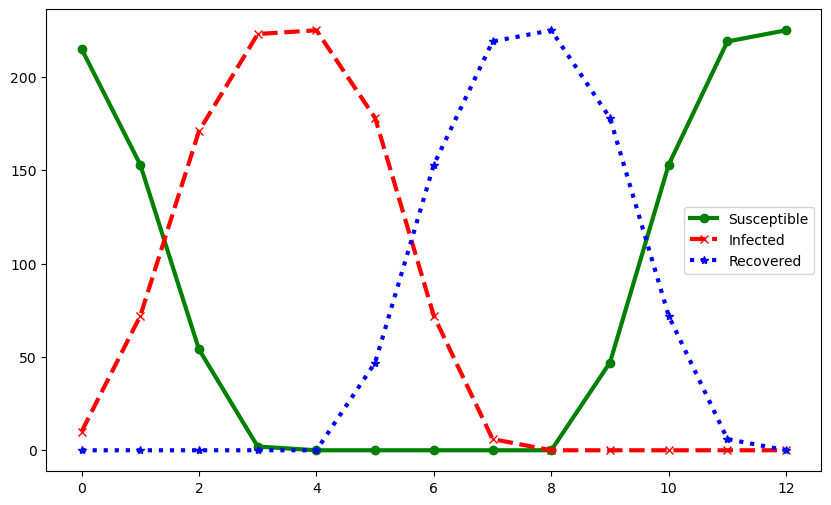

In [8]:
length = len(result)
plt.figure(figsize=[10, 6])
plt.plot(range(0,length), result[:,0], marker = 'o', lw = 3, color = "green")
plt.plot(range(0,length), result[:,1], marker = 'x', linestyle = '--',lw = 3, color = "red")
plt.plot(range(0,length), result[:,2], marker = '*', linestyle = ':',lw = 3, color = "blue")
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.show()

#Suseptibles: 35 Infected: 153 Recovered: 37 Times: 4